# Bonus Problem
## Bringing in a new dataset to investigate

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in files

In [2]:
gdp_per = pd.read_csv('C:/Users/theoc/Documents/NSS/Python/Projects/un_project-theo-carr/data/gdp_percapita.csv')
internet_use = pd.read_csv('C:/Users/theoc/Documents/NSS/Python/Projects/un_project-theo-carr/data/internet_use_new.csv')
## find one more dataset(or more) to merge with existing data sets
greenhouse = pd.read_csv('C:/Users/theoc/Documents/NSS/Python/Projects/un_project-theo-carr/data/greenhouse_emissions.csv')

#### Clean up dataframes

In [3]:
### Get rid of value footnotes from gdp and internet
gdp_per = gdp_per.drop(columns = ['Value Footnotes'])
internet_use = internet_use.drop(columns = ['Value Footnotes'])

#### See how they all look

In [4]:
print('gdp')
print(gdp_per.head(2))
print('internet')
print(internet_use.head(2))
print('greenhouse')
print(greenhouse.head(2))

gdp
  Country or Area  Year        Value
0     Afghanistan  2020  1970.560169
1     Afghanistan  2019  2065.036235
internet
  Country or Area  Year  Value
0     Afghanistan  2014   6.39
1     Afghanistan  2013   5.90
greenhouse
  Country or Area  Year        Value
0       Australia  2019  416563.5328
1       Australia  2018  415339.7085


#### all looks good
#### now lets explore greenhouse data and generate any questions we might have

### First, let's just look at the spread

In [5]:
greenhouse.columns = ['Country', 'Year','Value']

In [6]:
greenhouse.columns

Index(['Country', 'Year', 'Value'], dtype='object')

array([[<AxesSubplot:title={'center':'Value'}>]], dtype=object)

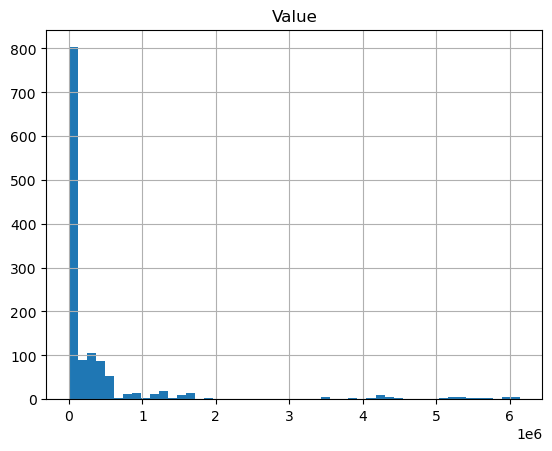

In [7]:
greenhouse.hist('Value', bins = 50,histtype = 'bar')



#### We see that there is a heavy concentration of countries who fall in the low emissions area, with small amounts of countries in the middle and higher emissions sections

## Now, let's make a combined table that contains all of the data from each dataframe
#### (internet, gdp per capita, greenhouse emissions)

### Merge Internet and GDP

In [8]:
### Testing Shape to help see if joins are successful
print(internet_use.shape)
print(gdp_per.shape)
print(greenhouse.shape)

(4495, 3)
(7176, 3)
(1290, 3)


In [9]:
## We need to clean up the column names of all the tables to make joining easier
gdp_per.columns = ['country','year','gdp_per']
print(gdp_per.columns)
internet_use.columns = ['country','year','internet_use_pct']
print(internet_use.columns)
greenhouse.columns = ['country','year','greenhouse_emissions']
print(greenhouse.columns)

Index(['country', 'year', 'gdp_per'], dtype='object')
Index(['country', 'year', 'internet_use_pct'], dtype='object')
Index(['country', 'year', 'greenhouse_emissions'], dtype='object')


In [10]:
## perform the first join (using outer to not lose any data)
gdp_internet = gdp_per.merge(internet_use, how = 'outer', on = ['country','year'])
gdp_internet.shape

(8256, 4)

In [11]:
## perform the third join
country_stats  = gdp_internet.merge(greenhouse, how = 'outer', on = ['country', 'year'])
country_stats

,country,year,gdp_per,internet_use_pct,greenhouse_emissions
0,Afghanistan,2020,1970.560169,NaN,NaN
1,Afghanistan,2019,2065.036235,NaN,NaN
2,Afghanistan,2018,2033.804389,NaN,NaN
3,Afghanistan,2017,2058.400221,NaN,NaN
4,Afghanistan,2016,2057.067978,NaN,NaN
...,...,...,...,...,...
8419,United States of America,1994,NaN,NaN,5358824.048
8420,United States of America,1993,NaN,NaN,5267343.060
8421,United States of America,1992,NaN,NaN,5167480.847
8422,United States of America,1991,NaN,NaN,5057930.940


#### looks good for now, may come back and fix later if any problems are discovered

In [12]:
### Create list full of years we are interested in looking at
### for this purpose, going to look every five years from the start to the end of the dataframe
bidecade_years = []
for i in range(7):
    bidecade_years.append(1990 + (i * 5))
print(bidecade_years)

[1990, 1995, 2000, 2005, 2010, 2015, 2020]


In [13]:
cs_bidec = country_stats.query('year in @bidecade_years')
cs_bidec = cs_bidec.reset_index(drop = True)
cs_bidec

,country,year,gdp_per,internet_use_pct,greenhouse_emissions
0,Afghanistan,2020,1970.560169,NaN,NaN
1,Afghanistan,2015,2068.265904,NaN,NaN
2,Afghanistan,2010,1957.029070,4.000000,NaN
3,Afghanistan,2005,1286.793659,1.224148,NaN
4,Africa Eastern and Southern,2020,3491.978104,NaN,NaN
...,...,...,...,...,...
1870,United States of America,2010,NaN,NaN,5675786.435
1871,United States of America,2005,NaN,NaN,6134521.473
1872,United States of America,2000,NaN,NaN,6010508.353
1873,United States of America,1995,NaN,NaN,5421502.465


### let's seaborn this table

#### but this table is too big, so we need to look at the top/bottom 5

#### first, let's start with the top 5 emissions

In [15]:
top_emissions = greenhouse.sort_values(by = 'greenhouse_emissions', ascending = False).head(5)
top_emissions

,country,year,greenhouse_emissions
1274,United States of America,2005,6134521.473
1272,United States of America,2007,6131004.158
1275,United States of America,2004,6114006.880
1273,United States of America,2006,6051668.046
1276,United States of America,2003,6011837.495


#### We see that it is all the united states ... so lets look year by year
#### starting with the earliest year = 1990

In [31]:
yr_1990 = country_stats.query('year == 1990 & country != "European Union"')
top_1990 = yr_1990.sort_values(by = 'greenhouse_emissions', ascending = False)
top_1990 = top_1990.head(5)
top_1990

,country,year,gdp_per,internet_use_pct,greenhouse_emissions
8423,United States of America,1990,NaN,NaN,5.113455e+06
8354,Russian Federation,1990,NaN,NaN,2.525518e+06
3220,Japan,1990,32846.38961,0.020294,1.158007e+06
2363,Germany,1990,36699.48170,0.125892,1.052477e+06
6807,Ukraine,1990,16428.48047,0.000000,7.058300e+05


#### looks good

### let's concat every five years going to 2020

In [53]:
temp_list = []
for i in range(6):
    yr = bidecade_years[i]
    temp_df = country_stats.query('year == @yr & country != "European Union"')
    temp_df = temp_df.sort_values(by = 'greenhouse_emissions',ascending = False)
    temp_df = temp_df.head(5)
    temp_list.append(temp_df)
yr_1990 = temp_list[0]
yr_1995 = temp_list[1]
yr_2000 = temp_list[2]
yr_2005 = temp_list[3]
yr_2010 = temp_list[4]
yr_2015 = temp_list[5]
rolling_top_emissions = pd.concat([yr_1990, yr_1995,yr_2000,yr_2005,yr_2010,yr_2015])
rolling_top_emissions = rolling_top_emissions.reset_index(drop = True)
rolling_top_emissions
    

,country,year,gdp_per,internet_use_pct,greenhouse_emissions
0,United States of America,1990,NaN,NaN,5.113455e+06
1,Russian Federation,1990,NaN,NaN,2.525518e+06
2,Japan,1990,32846.38961,0.020294,1.158007e+06
3,Germany,1990,36699.48170,0.125892,1.052477e+06
4,Ukraine,1990,16428.48047,0.000000,7.058300e+05
5,United States of America,1995,NaN,NaN,5.421502e+06
6,Russian Federation,1995,NaN,NaN,1.613141e+06
7,Japan,1995,34867.58039,1.594363,1.239620e+06
8,Germany,1995,39366.08864,1.837738,9.389684e+05
9,United Kingdom,1995,33375.70964,1.895168,5.672616e+05


## Lets Seaborn it

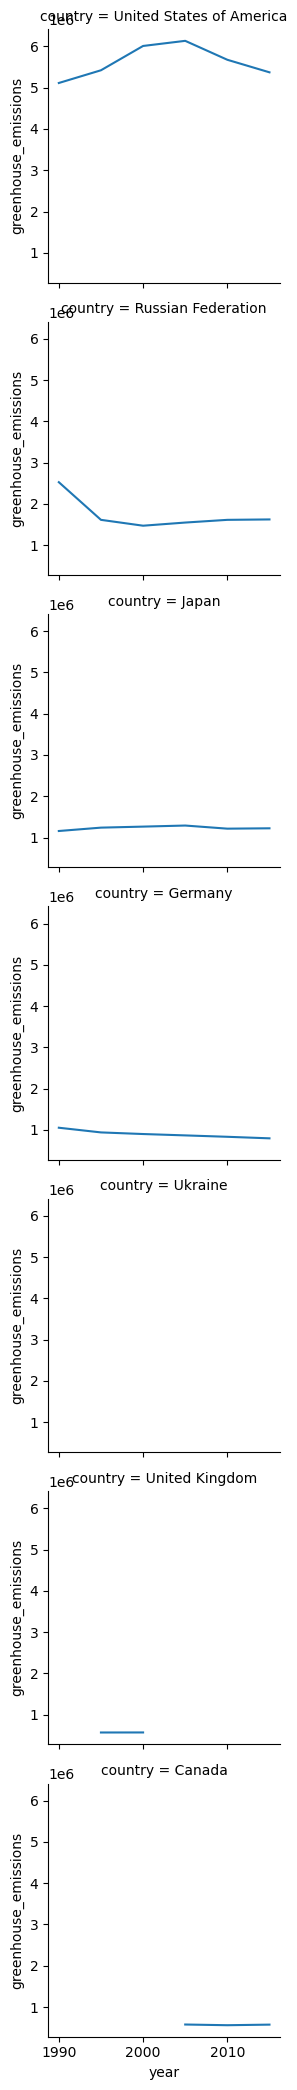

In [54]:
rolling_emissions_facet = sns.FacetGrid(rolling_top_emissions, row = 'country')
rolling_emissions_map = rolling_emissions_facet.map(sns.lineplot, 'year', 'greenhouse_emissions')